In [2]:
!pip install skfeature-chappers

     |████████████████████████████████| 66 kB 2.6 MB/s 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2, SelectKBest
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from skfeature.function.similarity_based import fisher_score
from sklearn.decomposition import PCA

In [13]:
df = pd.read_csv("FinalDataReg.csv")

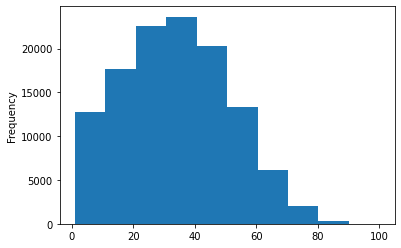

In [14]:
df.Popularity.plot.hist()

In [15]:
for c in df.columns:
  if (type(df[c][0]) != type('str') and c != 'Popularity'):
    mina=df[c].min()
    maxa=df[c].max()
    df[c] = df[c].apply(lambda x : (x - mina) / ( maxa-mina))

In [16]:
arr = df.to_numpy()
X, y = arr[:,5:19] , arr[:,19]
y_hat  = np.where(y >= 45, 1, 0)

In [22]:
df2 = df.sample(n=10000,random_state=3)
print(df2.shape)
arr2 = df2.to_numpy()

(10000, 20)


Fisher Score

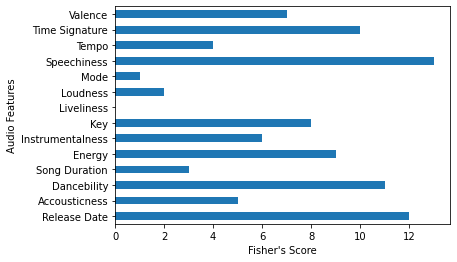

In [21]:
fish = pd.Series(fisher_score.fisher_score(arr2[:,5:19],arr2[:,19]), df2.columns[5:len(df2.columns)-1])
fish.plot(kind='barh')
plt.ylabel('Audio Features')
plt.xlabel('Fisher\'s Score')
plt.show()

Mean Absolute Difference

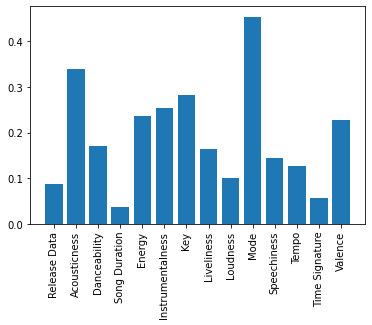

In [23]:
plt.bar(['Release Data', 'Acousticness', 'Danceability', 'Song Duration', 'Energy', 'Instrumentalness', 'Key', 'Liveliness', 'Loudness', 'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence'], np.sum(np.abs(X - np.mean(X, axis = 0)), axis = 0)/X.shape[0])
plt.xticks(rotation='vertical')
plt.show()

Heatmap

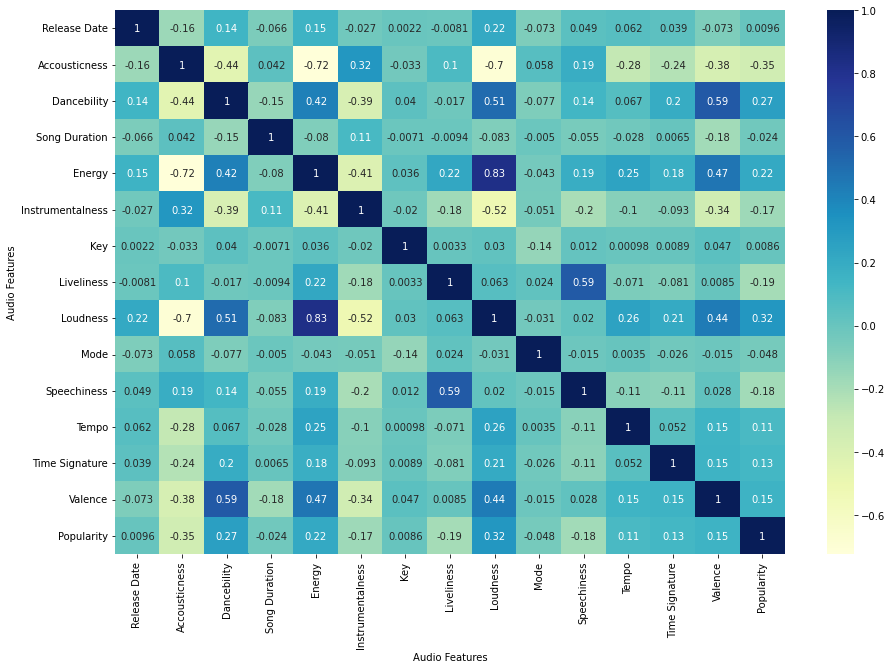

In [24]:
df2 = df.drop(df.columns[[0]], axis=1)
plt.figure(figsize = (15,10))
sb.heatmap(df2.corr(),annot=True,cmap="YlGnBu")
plt.xlabel('Audio Features')
plt.ylabel('Audio Features')
plt.show()

Information Gain

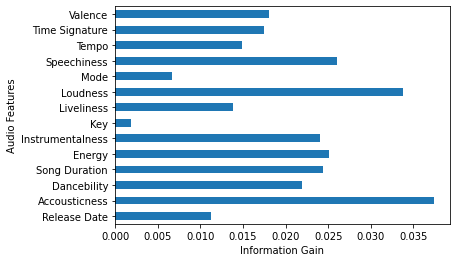

In [11]:
ig= pd.Series(mutual_info_classif(X, y_hat), df.columns[5:len(df.columns)-1])
ig.plot(kind='barh')
plt.ylabel('Audio Features')
plt.xlabel('Information Gain')
plt.show()